In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/PetFinder_train.csv')

In [3]:
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [5]:
df.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [6]:
from sklearn import tree

X = df.drop(columns=['Name', 'AdoptionSpeed', 'PetID', 'RescuerID', 'Description'])
y = df.AdoptionSpeed

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify to preserve class proportions

# Determine the optimal max depth

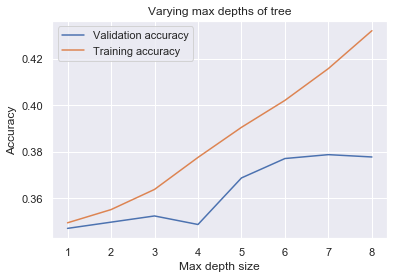

In [9]:
depth = np.arange(1,9)
train_accuracy = np.empty(len(depth))
val_accuracy = np.empty(len(depth))

for counter, k in enumerate(depth):
    treetest = tree.DecisionTreeClassifier(max_depth=k)
    
    treetest.fit(X_train, y_train)
    
    train_accuracy[counter] = treetest.score(X_train, y_train)
    
    val_accuracy[counter] = treetest.score(X_val, y_val)
    
plt.title('Varying max depths of tree')
plt.plot(depth, val_accuracy, label='Validation accuracy')
plt.plot(depth, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Max depth size')
plt.ylabel('Accuracy')
plt.show()

6 appears to be the ideal max depth of tree to get the most information out of validation and not overfit the training set. Accuracy is still not ideal though, it's at 38% at best.

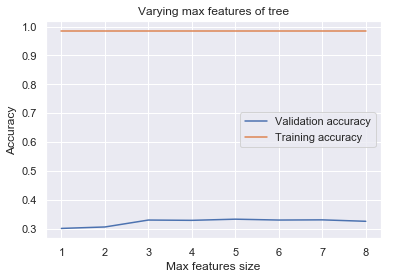

In [10]:
features = np.arange(1,9)
train_accuracy = np.empty(len(features))
val_accuracy = np.empty(len(features))

for counter, k in enumerate(depth):
    treetest_features = tree.DecisionTreeClassifier(max_features=k)
    
    treetest_features.fit(X_train, y_train)
    
    train_accuracy[counter] = treetest_features.score(X_train, y_train)
    
    val_accuracy[counter] = treetest_features.score(X_val, y_val)
    
plt.title('Varying max features of tree')
plt.plot(features, val_accuracy, label='Validation accuracy')
plt.plot(features, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Max features size')
plt.ylabel('Accuracy')
plt.show()

Max features doesn't seem to matter on accuracy

In [11]:
dtclf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    random_state=42
)

dtclf.fit(X, y)

dtclf.score(X, y)

0.3739745214433402

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()

In [13]:
rfclf.fit(X, y)
rfclf.score(X, y)

0.9683852464483426

Wow! An optimized decision tree gave a 38% accuracy. Without doing any kind of tinkering, random forest immediately gives a 97% accuracy.

In [14]:
# decision tree computation time
import time
start_time = time.time()
dtclf.predict(X)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00570368766784668 seconds ---


In [15]:
# random forest computation time
import time
start_time = time.time()
rfclf.predict(X)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09196829795837402 seconds ---


Looks like the superiority of the random forest in accuracy is at the cost of being 15 times slower than decision tree computation. Not an issue in a case with small enough datasets as is the case here.